<a href="https://colab.research.google.com/github/darkknightraj/machinelearning/blob/main/multipleLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('play_tennis.csv')
data.head(20)
data.isnull().sum()
data.duplicated().any()


False

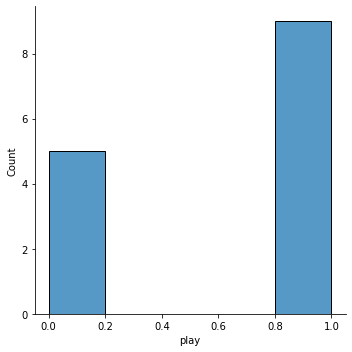

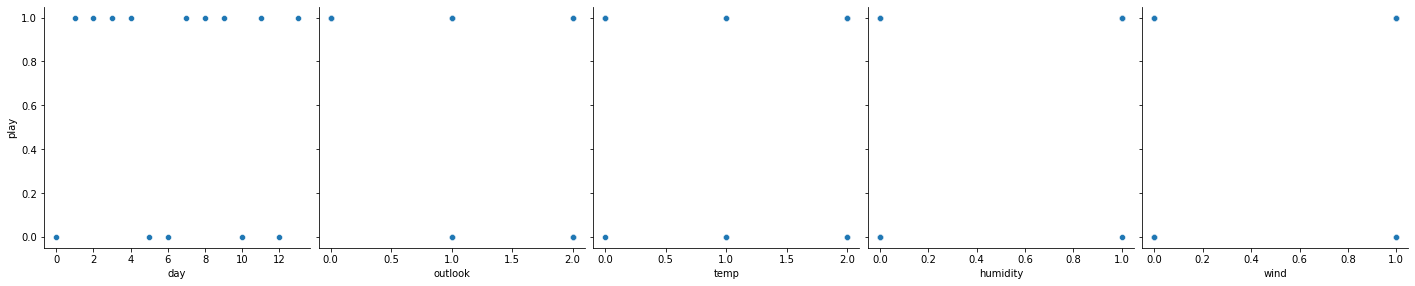

In [ ]:
from sklearn import preprocessing
string_to_int=preprocessing.LabelEncoder()
data=data.apply(string_to_int.fit_transform)
data.head(15)
x=data.drop(data.columns[[5]],axis=1)
x.head(15)
y=data['play']
y.head(15)
sns.displot(data['play']);
sns.pairplot(data,x_vars=['day','outlook','temp','humidity','wind'],y_vars=['play'],height=4,aspect=1,kind='scatter')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train
y_train


13    0
9     1
1     0
7     0
10    1
3     1
0     0
5     0
12    1
Name: play, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(x_train,y_train)
print("intercept=",mlr.intercept_)
print("coefficients=")


intercept= -0.1352785145888593
coefficients=


In [ ]:
list(zip(x,mlr.coef_))
y_pred_mlr=mlr.predict(x_test)
print("Predictionfortestset:{}".format(y_pred_mlr))
mlr_diff=pd.DataFrame({'Actualvalue':y_test,'Predictedvalue':y_pred_mlr})
mlr_diff


Predictionfortestset:[0.07559682 0.23872679 0.31564987 0.54774536 0.32493369]


,Actualvalue,Predictedvalue
8,1,0.075597
6,1,0.238727
4,1,0.315650
11,1,0.547745
2,1,0.324934


In [ ]:
from sklearn import metrics
print('Rsquared:{:.2f}'.format(mlr.score(x,y)*100))

Rsquared:2.20
